<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - ML Models for Tabular Datasets <br>
<font color=696880 size=4>
    Niloufar Razani 
    
    
____

### Full Name : Ali Nazari
### Student Number : 99102401
___

<font face="Times New Roman" size=4><div dir=ltr>
In this homework we are going to implement Adaboost algorithm from scratch. Please read this chapter's <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/tree/main/Jupyter_Notebooks/Chapter_04_Tabular_Data_Models"><font face="Roboto">notebook</font></a> and then complete the #TODO sections. <br>
We will use the heart_disease.csv dataset, which you can see more details about in this <a href="https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download&select=heart.csv"><font face="Roboto">Link</font></a>.
___

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier

### Data Prepration (10 points) 
1.   Load Dataset
2.   Separate target feaure
3.   Change class labels to 1 and -1
4.   Do train-test split

In [30]:
dataset = pd.read_csv('heart_disease.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [31]:
X = dataset[dataset.columns[:-1]]
y = dataset[dataset.columns[-1]]

In [32]:
changed = list()
for i in y:
  changed.append(1) if i == 1 else changed.append(-1)
y = pd.DataFrame(changed)
y = y.squeeze()

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Adaboost Algorithm Implementation (40 points)

In [34]:
def calculate_error(y, y_pred, w):
  number_of_wrong = np.not_equal(y, y_pred).astype(int)
  return sum(w * number_of_wrong)/sum(w)
    

def calculate_alpha(error):
  expression = (1 - error) / error
  return np.log(expression)
    

def update_weights(w, alpha, y, y_pred):
  number_of_wrong = np.not_equal(y, y_pred).astype(int)
  hyper_added = alpha * number_of_wrong
  return w * np.exp(hyper_added)
    

    
class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.training_errors = []

    def fit(self, X, y, M = 100):
        
        self.alphas = [] 
        self.training_errors = []
        self.M = M

        for m in range(0, M):
            
            if m == 0:
                w_i = np.ones(len(y)) / len(y)
                 
            else:
                w_i = update_weights(w_i, weak_alpha, y, y_pred)
               
            
            weak_learner = DecisionTreeClassifier(max_depth = 1)
            weak_learner.fit(X, y, sample_weight = w_i)
            y_pred = weak_learner.predict(X)
            self.G_M.append(weak_learner)


            weak_error = calculate_error(y, y_pred, w_i)
            self.training_errors.append(weak_error)


            weak_alpha = calculate_alpha(weak_error)
            self.alphas.append(weak_alpha)



    def predict(self, X):

        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:,m] = y_pred_m

        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred

### Training and Evaluation (20 points)

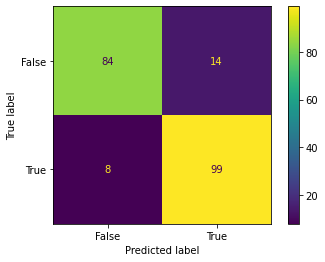

accuracy: 0.8926829268292683
precision: 0.8761061946902655
sensitivity: 0.9252336448598131
specifity: 0.9252336448598131
F1 score: 0.9


In [35]:
model = AdaBoost()
model.fit(x_train, y_train)


y_pred = np.array(model.predict(x_test))
y_test = np.array(y_test)

# I know the formula and how to calculate these metrics and they are easy
# but this way, with sklearn library is cleaner :)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

Accuracy = metrics.accuracy_score(y_test, y_pred)
print("accuracy:", Accuracy)
Precision = metrics.precision_score(y_test, y_pred)
print("precision:", Precision)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
print("sensitivity:", Sensitivity_recall)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=1)
print("specifity:", Specificity)
F1_score = metrics.f1_score(y_test, y_pred)
print("F1 score:", F1_score)

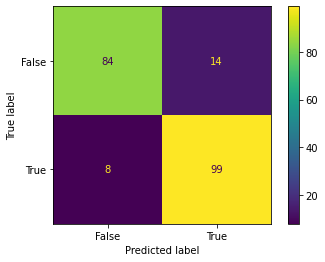

accuracy: 0.8926829268292683
precision: 0.8761061946902655
sensitivity: 0.9252336448598131
specifity: 0.9252336448598131
F1 score: 0.9


In [36]:
# I used course notebooks code for this section
classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1), n_estimators=200, algorithm="SAMME", learning_rate=0.5)
classifier.fit(x_train, y_train)
y_perd = np.array(classifier.predict(x_test))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

Accuracy = metrics.accuracy_score(y_test, y_pred)
print("accuracy:", Accuracy)
Precision = metrics.precision_score(y_test, y_pred)
print("precision:", Precision)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
print("sensitivity:", Sensitivity_recall)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=1)
print("specifity:", Specificity)
F1_score = metrics.f1_score(y_test, y_pred)
print("F1 score:", F1_score)

### Early Stopping (15 points)

In [37]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)
y_val = np.array(y_val)
error_list = []
for estimators_number in range(200):
    model = AdaBoost()
    model.fit(x_train, y_train, M=estimators_number + 1)
    error_list.append(1 - metrics.accuracy_score(y_val, model.predict(x_val)))

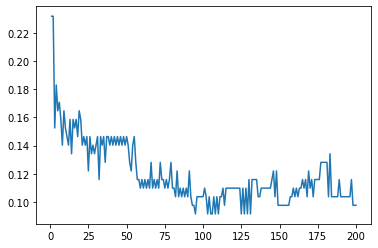

In [38]:
plt.plot(np.arange(1, 201), np.array(error_list))
plt.show()

In [39]:
print("best number of estimator(s):", np.argmin(error_list) + 1)
print("best value of accuracy:", 1 - error_list[np.argmin(error_list)])
print("best value of error:", error_list[np.argmin(error_list)])

best number of estimator(s): 95
best value of accuracy: 0.9085365853658537
best value of error: 0.09146341463414631


### Weighted Error (10 points)

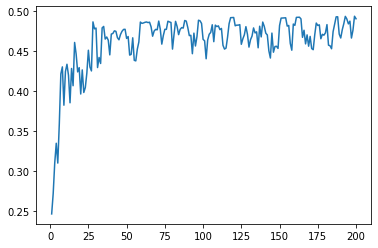

In [40]:
model = AdaBoost()
model.fit(x_train, y_train, M = 200)
plt.plot(np.arange(1, 201), np.array(model.training_errors))
plt.show()

### Question : Why does the weighted error tend to increase as the number of estimators increase? (5points)

در کل می دانیم که اینگونه کار می کند که در هر کلاس بندی کننده ضعیف، برخی درست پیشبینی می شوند که هیچی و برخی اشتباه پیشبینی می شوند. آنهایی که اشتباه پیشبینی می شوند، وزن آن ها افزایش پیدا می کند و در نتیجه لایه بعد اهمیت بیشتری به آن می دهد. ولی دقت کنیم که هر داده ای که در چند لایه اشتباه تشخیص داده می شود، یعنی داده سختی است و در نتیجه احتمال اشتباه ماندن آن زیاد است و در نتیجه مدام وزن آن زیاد می شود و در نتیجه مدام به میزان خطای وزن دار ما می افزاید. در نتیجه این مقدار خطا مدام زیاد می شود و باعث می شود که نتیجه مثل عکس و نمودار بالا شود و با افزایش تعداد استیمیتور ها، خطا هم بیشتر می شود.